In [1]:
#all imports
import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix

In [2]:
data = pd.read_csv('../Data/Lending Club Data - DR_Demo_Lending_Club.csv')

In [3]:
num_cols = ['annual_inc',
 'debt_to_income',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mths_since_last_major_derog']

target_val = ['is_bad']

cat_cols = ['policy_code',
 'verification_status',
 'initial_list_status',
 'pymnt_plan',
 'purpose_cat',
 'home_ownership']

bin_encode_cols = ['addr_state','zip_code']

In [4]:
X = data[num_cols+cat_cols+bin_encode_cols]

In [5]:
y = data[target_val]

In [6]:
y.shape

(10000, 1)

In [7]:
X_median= X[num_cols].median()
X_median.head()
X[num_cols]= X[num_cols].fillna(X_median)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [8]:
# DATA - PREPROCESSING

# One hot encoding
X = pd.concat([pd.get_dummies(X[cat_cols]), X[num_cols], X[bin_encode_cols]],axis=1)

# Binary Encoding
ce_bin = ce.BinaryEncoder(cols = ['addr_state','zip_code'])
X = ce_bin.fit_transform(X, y)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train[num_cols]= sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.transform(X_test[num_cols])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://p

In [9]:
X_train[num_cols].head()

,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
2967,0.335169,-0.788128,-0.29317,-0.043795,0.375132,-0.243003,-0.199708,-0.323435,0.768322,1.241202
700,-0.707519,-0.315560,-0.29317,-0.712768,-0.965477,-0.243003,-0.062011,1.621402,-1.200681,0.009362
3481,-1.035727,-0.299264,-0.29317,-0.712768,-0.295172,-0.243003,-0.250636,-0.348232,-1.029463,0.009362
1621,0.274689,0.128862,-0.29317,-0.712768,0.598567,3.610113,0.075135,0.990836,0.597104,1.241202
800,-0.188997,-1.475500,-0.29317,-0.712768,-0.965477,-0.243003,-0.425863,-1.492463,-0.430201,-1.222478


In [10]:
X_test[num_cols].head()

,annual_inc,debt_to_income,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,mths_since_last_major_derog
9394,-0.519625,-1.173293,-0.29317,1.294150,-1.412347,-0.243003,-0.294844,0.271707,-1.115072,-1.222478
898,1.101259,0.751052,-0.29317,0.625177,1.045437,3.610113,0.686569,0.540937,1.110757,1.241202
2398,-0.148676,0.795494,-0.29317,-0.712768,1.268872,-0.243003,-0.477509,-0.560783,0.425887,1.241202
5906,-0.612362,1.503606,-0.29317,-0.043795,0.822002,-0.243003,0.194869,0.466545,0.425887,1.241202
2343,-0.632522,0.967337,-0.29317,-0.043795,1.045437,-0.243003,-0.093414,0.505512,-0.601419,1.241202


# Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
y_pred_train_rf= rf_classifier.predict(X_train)

In [14]:
print('Precision', precision_score(y_train, y_pred_train_rf))
print('Accuracy', accuracy_score(y_train, y_pred_train_rf))
print('F1 Score', f1_score(y_train, y_pred_train_rf))
print('Recall', recall_score(y_train, y_pred_train_rf))

Precision 1.0
Accuracy 0.9796
F1 Score 0.915702479338843
Recall 0.8445121951219512


In [15]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = rf_classifier, X = X_train, y = y_train, cv =10)
print(accuracies.mean())
print(accuracies.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y wa

0.8802680952914287
0.003989762447961602


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [16]:
y_pred_test_rf = rf_classifier.predict(X_test)

In [17]:
print('Precision', precision_score(y_test, y_pred_test_rf))
print('Accuracy', accuracy_score(y_test, y_pred_test_rf))
print('F1 Score', f1_score(y_test, y_pred_test_rf))
print('Recall', recall_score(y_test, y_pred_test_rf))

Precision 0.8181818181818182
Accuracy 0.8868
F1 Score 0.2028169014084507
Recall 0.1157556270096463


In [18]:
cm = confusion_matrix(y_test,y_pred_test_rf)
print(cm)

[[2181    8]
 [ 275   36]]


# SVM

In [19]:
from sklearn.svm import SVC
svm_classifier = SVC(probability = True)
svm_classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
y_pred_train_svm= svm_classifier.predict(X_train)

In [21]:
print('Precision', precision_score(y_train, y_pred_train_svm))
print('Accuracy', accuracy_score(y_train, y_pred_train_svm))
print('F1 Score', f1_score(y_train, y_pred_train_svm))
print('Recall', recall_score(y_train, y_pred_train_svm))

Precision 1.0
Accuracy 0.8790666666666667
F1 Score 0.14514608859566447
Recall 0.0782520325203252


In [22]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv =10)
print(accuracies.mean())
print(accuracies.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

0.879066493629322
0.0031627841016602033


In [23]:
y_pred_test_svm = svm_classifier.predict(X_test)

In [24]:
print('Precision', precision_score(y_test, y_pred_test_svm))
print('Accuracy', accuracy_score(y_test, y_pred_test_svm))
print('F1 Score', f1_score(y_test, y_pred_test_svm))
print('Recall', recall_score(y_test, y_pred_test_svm))

Precision 1.0
Accuracy 0.8856
F1 Score 0.1488095238095238
Recall 0.08038585209003216


In [25]:
cm = confusion_matrix(y_test,y_pred_test_svm)
print(cm)

[[2189    0]
 [ 286   25]]


# ROC Curve

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
y_scores_sm= svm_classifier.predict_proba(X_test.values)
y_scores_rf = rf_classifier.predict_proba(X_test.values)

In [48]:
fpr_rf, tpr_rf, thresholds_rf= roc_curve(y_test, y_scores_rf[:,1])
fpr_svm, tpr_svm, thresholds_svm= roc_curve(y_test, y_scores_sm[:,1])

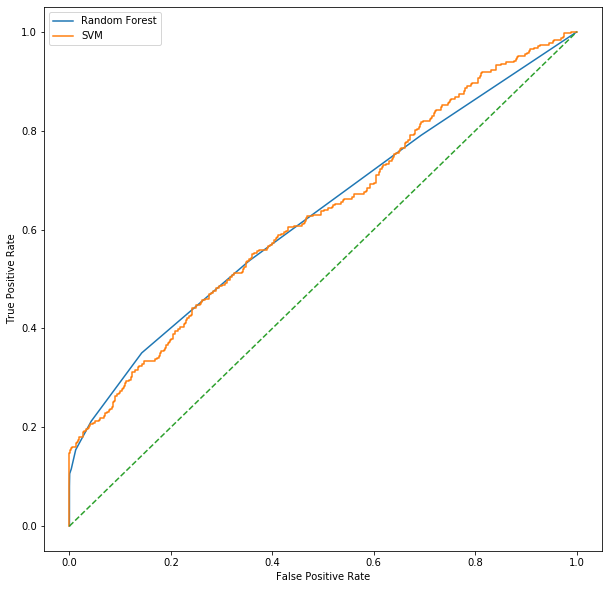

In [51]:
plt.figure(figsize=(10, 10))

plt.plot(fpr_rf, tpr_rf, label= 'Random Forest')
plt.plot(fpr_svm, tpr_svm, label= 'SVM')

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [55]:
# AUC for Random Forest
roc_auc_score(y_test,y_scores_rf[:,1])

0.628825213468688

In [54]:
# AUC for SVM
roc_auc_score(y_test,y_scores_sm[:,1])

0.6306128714311106

# Pickle Creation

In [56]:
import pickle

In [57]:
dict_objects = {'Binary Encoder': ce_bin, 'Standard Scaling':sc, 'Random Forest Classifier': rf_classifier, 'SVM Classifier': svm_classifier}

In [61]:
filename = '../Pickles/ModelPickles.pkl'
outfile = open(filename,'wb')

In [62]:
pickle.dump(dict_objects,outfile)
outfile.close()

In [63]:
# infile = open(filename,'rb')
# new_dict = pickle.load(infile)
# infile.close()

In [11]:
import json
test = X_test.iloc[10:11].values

In [12]:
y_test[10:11].values

array([[0]], dtype=int64)

In [13]:
type(test)
test.shape
test.reshape(1, -1)
instances = test.tolist()

import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'mwpmltr-8c4a77dae4f9.json'

In [18]:
instances

[[0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.3351694785046214,
  -1.6991921332857771,
  1.6682692994209947,
  0.6251773645286142,
  -0.5186073326978364,
  -0.2430031831025221,
  -0.49893721770962746,
  -0.12151172556141067,
  0.8539308055811395,
  1.2412021429038655,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0]]

In [17]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS']

'mwpmltr-8c4a77dae4f9.json'

In [14]:
import googleapiclient.discovery

def predict_json(project, model, instances, version=None):
    """Send json data to a deployed model for prediction.
    Args:
        project (str): project where the AI Platform Prediction Model is deployed.
        model (str): model name.
        instances ([[float]]): List of input instances, where each input
           instance is a list of floats.
        version: str, version of the model to target.
    Returns:
        Mapping[str: any]: dictionary of prediction results defined by the
            model.
    """
    # Create the AI Platform Prediction service object.
    # To authenticate set the environment variable
    # GOOGLE_APPLICATION_CREDENTIALS=<path_to_service_account_file>
    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()
   
    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']
